In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../")

In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import torch
import torch.nn as nn
from torchsummary import summary

from data.input_transforms import InputTransform
from data.cifar import CIFAR
from data.stl import STL, LABEL_MAP
from data.dataloader import get_dataloader
from models.optimizer import optimizer, scheduler
from networks.twolayernet import TwolayerNet
from networks.convnet import ConvNet
from utils.viz import plot_multiple_quantities_by_time, show_many_images
from main import train, evaluate, fix_seed

sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)


### Train the network

:::: Loaded dataset from ../datasets/STL-10/: X ((500, 96, 96, 3)) y (500)
:::: Loaded dataset from ../datasets/STL-10/: X ((2000, 96, 96, 3)) y (2000)
:::: Loaded dataset from ../datasets/STL-10/: X ((4000, 96, 96, 3)) y (4000)


Evaluate: Epoch [1/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 73.72it/s]                      


VALID 	: Summary: Loss: 1.8570 Accuracy: 0.2040
TRAIN 	: Summary: Loss: 1.8377 Accuracy: 0.2215


Evaluate: Epoch [2/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 58.62it/s]                      


VALID 	: Summary: Loss: 1.8023 Accuracy: 0.2040
TRAIN 	: Summary: Loss: 1.7935 Accuracy: 0.2295


Evaluate: Epoch [3/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 81.99it/s]                      


VALID 	: Summary: Loss: 1.7517 Accuracy: 0.2160
TRAIN 	: Summary: Loss: 1.7358 Accuracy: 0.2450


Evaluate: Epoch [4/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 82.61it/s]                      


VALID 	: Summary: Loss: 1.7048 Accuracy: 0.2220
TRAIN 	: Summary: Loss: 1.6981 Accuracy: 0.2405


Evaluate: Epoch [5/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 82.04it/s]                      


VALID 	: Summary: Loss: 1.6615 Accuracy: 0.2420
TRAIN 	: Summary: Loss: 1.6685 Accuracy: 0.2595


Evaluate: Epoch [6/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 79.57it/s]                      


VALID 	: Summary: Loss: 1.6223 Accuracy: 0.2640
TRAIN 	: Summary: Loss: 1.6361 Accuracy: 0.2875


Evaluate: Epoch [7/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 81.74it/s]                      


VALID 	: Summary: Loss: 1.5849 Accuracy: 0.2900
TRAIN 	: Summary: Loss: 1.5924 Accuracy: 0.3060


Evaluate: Epoch [8/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.31it/s]                      


VALID 	: Summary: Loss: 1.5502 Accuracy: 0.3060
TRAIN 	: Summary: Loss: 1.5658 Accuracy: 0.3085


Evaluate: Epoch [9/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 82.32it/s]                      


VALID 	: Summary: Loss: 1.5185 Accuracy: 0.3280
TRAIN 	: Summary: Loss: 1.5310 Accuracy: 0.3315


Evaluate: Epoch [10/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.01it/s]                     


VALID 	: Summary: Loss: 1.4891 Accuracy: 0.3580
TRAIN 	: Summary: Loss: 1.4963 Accuracy: 0.3535


Evaluate: Epoch [11/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 81.73it/s]                     


VALID 	: Summary: Loss: 1.4619 Accuracy: 0.3720
TRAIN 	: Summary: Loss: 1.4831 Accuracy: 0.3540


Evaluate: Epoch [12/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 80.93it/s]                     


VALID 	: Summary: Loss: 1.4362 Accuracy: 0.3840
TRAIN 	: Summary: Loss: 1.4547 Accuracy: 0.3855


Evaluate: Epoch [13/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.35it/s]                     


VALID 	: Summary: Loss: 1.4121 Accuracy: 0.3940
TRAIN 	: Summary: Loss: 1.4480 Accuracy: 0.3775


Evaluate: Epoch [14/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 81.08it/s]                     


VALID 	: Summary: Loss: 1.3899 Accuracy: 0.3900
TRAIN 	: Summary: Loss: 1.4123 Accuracy: 0.3975


Evaluate: Epoch [15/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 79.36it/s]                     


VALID 	: Summary: Loss: 1.3686 Accuracy: 0.3980
TRAIN 	: Summary: Loss: 1.3917 Accuracy: 0.4125


Evaluate: Epoch [16/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 82.66it/s]                     


VALID 	: Summary: Loss: 1.3485 Accuracy: 0.4120
TRAIN 	: Summary: Loss: 1.3788 Accuracy: 0.4175


Evaluate: Epoch [17/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 82.34it/s]                     


VALID 	: Summary: Loss: 1.3300 Accuracy: 0.4300
TRAIN 	: Summary: Loss: 1.3574 Accuracy: 0.4315


Evaluate: Epoch [18/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.18it/s]                     


VALID 	: Summary: Loss: 1.3122 Accuracy: 0.4340
TRAIN 	: Summary: Loss: 1.3453 Accuracy: 0.4225


Evaluate: Epoch [19/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 81.00it/s]                     


VALID 	: Summary: Loss: 1.2951 Accuracy: 0.4480
TRAIN 	: Summary: Loss: 1.3256 Accuracy: 0.4430


Evaluate: Epoch [20/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.55it/s]                     


VALID 	: Summary: Loss: 1.2794 Accuracy: 0.4580
TRAIN 	: Summary: Loss: 1.3153 Accuracy: 0.4460


Evaluate: Epoch [21/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 82.14it/s]                     


VALID 	: Summary: Loss: 1.2644 Accuracy: 0.4720
TRAIN 	: Summary: Loss: 1.2996 Accuracy: 0.4515


Evaluate: Epoch [22/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 78.88it/s]                     


VALID 	: Summary: Loss: 1.2500 Accuracy: 0.4800
TRAIN 	: Summary: Loss: 1.2812 Accuracy: 0.4550


Evaluate: Epoch [23/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 81.81it/s]                     


VALID 	: Summary: Loss: 1.2360 Accuracy: 0.4900
TRAIN 	: Summary: Loss: 1.2745 Accuracy: 0.4710


Evaluate: Epoch [24/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 76.10it/s]                     


VALID 	: Summary: Loss: 1.2232 Accuracy: 0.5000
TRAIN 	: Summary: Loss: 1.2603 Accuracy: 0.4780


Evaluate: Epoch [25/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 80.44it/s]                     


VALID 	: Summary: Loss: 1.2108 Accuracy: 0.5060
TRAIN 	: Summary: Loss: 1.2503 Accuracy: 0.4885


Evaluate: Epoch [26/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 82.70it/s]                     


VALID 	: Summary: Loss: 1.1988 Accuracy: 0.5060
TRAIN 	: Summary: Loss: 1.2370 Accuracy: 0.4765


Evaluate: Epoch [27/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 80.61it/s]                     


VALID 	: Summary: Loss: 1.1877 Accuracy: 0.5140
TRAIN 	: Summary: Loss: 1.2322 Accuracy: 0.4890


Evaluate: Epoch [28/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 81.22it/s]                     


VALID 	: Summary: Loss: 1.1768 Accuracy: 0.5220
TRAIN 	: Summary: Loss: 1.2214 Accuracy: 0.4835


Evaluate: Epoch [29/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 82.64it/s]                     


VALID 	: Summary: Loss: 1.1664 Accuracy: 0.5260
TRAIN 	: Summary: Loss: 1.2014 Accuracy: 0.5000


Evaluate: Epoch [30/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 81.78it/s]                     


VALID 	: Summary: Loss: 1.1565 Accuracy: 0.5360
TRAIN 	: Summary: Loss: 1.1991 Accuracy: 0.4890


Evaluate: Epoch [31/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 81.79it/s]                     


VALID 	: Summary: Loss: 1.1471 Accuracy: 0.5360
TRAIN 	: Summary: Loss: 1.1837 Accuracy: 0.5070


Evaluate: Epoch [32/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 82.12it/s]                     


VALID 	: Summary: Loss: 1.1378 Accuracy: 0.5460
TRAIN 	: Summary: Loss: 1.1778 Accuracy: 0.5210


Evaluate: Epoch [33/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 82.63it/s]                     


VALID 	: Summary: Loss: 1.1292 Accuracy: 0.5480
TRAIN 	: Summary: Loss: 1.1736 Accuracy: 0.5120


Evaluate: Epoch [34/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 82.02it/s]                     


VALID 	: Summary: Loss: 1.1206 Accuracy: 0.5560
TRAIN 	: Summary: Loss: 1.1621 Accuracy: 0.5150


Evaluate: Epoch [35/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 80.73it/s]                     


VALID 	: Summary: Loss: 1.1126 Accuracy: 0.5560
TRAIN 	: Summary: Loss: 1.1617 Accuracy: 0.5185


Evaluate: Epoch [36/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 80.48it/s]                     


VALID 	: Summary: Loss: 1.1045 Accuracy: 0.5620
TRAIN 	: Summary: Loss: 1.1569 Accuracy: 0.5170


Evaluate: Epoch [37/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.71it/s]                     


VALID 	: Summary: Loss: 1.0970 Accuracy: 0.5660
TRAIN 	: Summary: Loss: 1.1392 Accuracy: 0.5315


Evaluate: Epoch [38/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 82.49it/s]                     


VALID 	: Summary: Loss: 1.0898 Accuracy: 0.5680
TRAIN 	: Summary: Loss: 1.1407 Accuracy: 0.5265


Evaluate: Epoch [39/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 79.67it/s]                     


VALID 	: Summary: Loss: 1.0829 Accuracy: 0.5660
TRAIN 	: Summary: Loss: 1.1327 Accuracy: 0.5270


Evaluate: Epoch [40/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 80.86it/s]                     


VALID 	: Summary: Loss: 1.0760 Accuracy: 0.5700
TRAIN 	: Summary: Loss: 1.1230 Accuracy: 0.5310


Evaluate: Epoch [41/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 81.84it/s]                     


VALID 	: Summary: Loss: 1.0696 Accuracy: 0.5740
TRAIN 	: Summary: Loss: 1.1193 Accuracy: 0.5345


Evaluate: Epoch [42/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 81.87it/s]                     


VALID 	: Summary: Loss: 1.0632 Accuracy: 0.5880
TRAIN 	: Summary: Loss: 1.1132 Accuracy: 0.5320


Evaluate: Epoch [43/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 77.94it/s]                     


VALID 	: Summary: Loss: 1.0571 Accuracy: 0.5920
TRAIN 	: Summary: Loss: 1.1067 Accuracy: 0.5540


Evaluate: Epoch [44/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 51.83it/s]                     


VALID 	: Summary: Loss: 1.0511 Accuracy: 0.5960
TRAIN 	: Summary: Loss: 1.1056 Accuracy: 0.5435


Evaluate: Epoch [45/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 64.78it/s]                     


VALID 	: Summary: Loss: 1.0453 Accuracy: 0.6040
TRAIN 	: Summary: Loss: 1.1037 Accuracy: 0.5530


Evaluate: Epoch [46/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 80.64it/s]                     


VALID 	: Summary: Loss: 1.0399 Accuracy: 0.6040
TRAIN 	: Summary: Loss: 1.0865 Accuracy: 0.5620


Evaluate: Epoch [47/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 81.92it/s]                     


VALID 	: Summary: Loss: 1.0345 Accuracy: 0.6040
TRAIN 	: Summary: Loss: 1.0771 Accuracy: 0.5570


Evaluate: Epoch [48/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 82.92it/s]                     


VALID 	: Summary: Loss: 1.0289 Accuracy: 0.6120
TRAIN 	: Summary: Loss: 1.0868 Accuracy: 0.5525


Evaluate: Epoch [49/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.28it/s]                     


VALID 	: Summary: Loss: 1.0237 Accuracy: 0.6160
TRAIN 	: Summary: Loss: 1.0694 Accuracy: 0.5665


Evaluate: Epoch [50/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 82.10it/s]                     


VALID 	: Summary: Loss: 1.0188 Accuracy: 0.6180
TRAIN 	: Summary: Loss: 1.0651 Accuracy: 0.5600


Evaluate: Epoch [51/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 81.50it/s]                     


VALID 	: Summary: Loss: 1.0141 Accuracy: 0.6220
TRAIN 	: Summary: Loss: 1.0726 Accuracy: 0.5670


Evaluate: Epoch [52/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.21it/s]                     


VALID 	: Summary: Loss: 1.0098 Accuracy: 0.6240
TRAIN 	: Summary: Loss: 1.0601 Accuracy: 0.5650


Evaluate: Epoch [53/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 76.09it/s]                     


VALID 	: Summary: Loss: 1.0050 Accuracy: 0.6260
TRAIN 	: Summary: Loss: 1.0499 Accuracy: 0.5830


Evaluate: Epoch [54/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 82.27it/s]                     


VALID 	: Summary: Loss: 1.0005 Accuracy: 0.6320
TRAIN 	: Summary: Loss: 1.0611 Accuracy: 0.5645


Evaluate: Epoch [55/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 82.73it/s]                     


VALID 	: Summary: Loss: 0.9962 Accuracy: 0.6320
TRAIN 	: Summary: Loss: 1.0484 Accuracy: 0.5780


Evaluate: Epoch [56/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 82.69it/s]                     


VALID 	: Summary: Loss: 0.9924 Accuracy: 0.6300
TRAIN 	: Summary: Loss: 1.0375 Accuracy: 0.5870


Evaluate: Epoch [57/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.22it/s]                     


VALID 	: Summary: Loss: 0.9881 Accuracy: 0.6320
TRAIN 	: Summary: Loss: 1.0395 Accuracy: 0.5860


Evaluate: Epoch [58/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.81it/s]                     


VALID 	: Summary: Loss: 0.9839 Accuracy: 0.6340
TRAIN 	: Summary: Loss: 1.0241 Accuracy: 0.5845


Evaluate: Epoch [59/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.90it/s]                     


VALID 	: Summary: Loss: 0.9802 Accuracy: 0.6340
TRAIN 	: Summary: Loss: 1.0271 Accuracy: 0.5845


Evaluate: Epoch [60/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.43it/s]                     


VALID 	: Summary: Loss: 0.9766 Accuracy: 0.6380
TRAIN 	: Summary: Loss: 1.0321 Accuracy: 0.5780


Evaluate: Epoch [61/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.95it/s]                     


VALID 	: Summary: Loss: 0.9729 Accuracy: 0.6380
TRAIN 	: Summary: Loss: 1.0340 Accuracy: 0.5840


Evaluate: Epoch [62/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 84.80it/s]                     


VALID 	: Summary: Loss: 0.9694 Accuracy: 0.6400
TRAIN 	: Summary: Loss: 1.0218 Accuracy: 0.5940


Evaluate: Epoch [63/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.34it/s]                     


VALID 	: Summary: Loss: 0.9661 Accuracy: 0.6440
TRAIN 	: Summary: Loss: 1.0154 Accuracy: 0.5740


Evaluate: Epoch [64/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.79it/s]                     


VALID 	: Summary: Loss: 0.9629 Accuracy: 0.6460
TRAIN 	: Summary: Loss: 1.0084 Accuracy: 0.5945


Evaluate: Epoch [65/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 84.47it/s]                     


VALID 	: Summary: Loss: 0.9597 Accuracy: 0.6500
TRAIN 	: Summary: Loss: 1.0077 Accuracy: 0.5965


Evaluate: Epoch [66/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 82.25it/s]                     


VALID 	: Summary: Loss: 0.9567 Accuracy: 0.6480
TRAIN 	: Summary: Loss: 1.0119 Accuracy: 0.5860


Evaluate: Epoch [67/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 82.62it/s]                     


VALID 	: Summary: Loss: 0.9536 Accuracy: 0.6520
TRAIN 	: Summary: Loss: 1.0097 Accuracy: 0.5945


Evaluate: Epoch [68/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 84.04it/s]                     


VALID 	: Summary: Loss: 0.9507 Accuracy: 0.6520
TRAIN 	: Summary: Loss: 1.0096 Accuracy: 0.5900


Evaluate: Epoch [69/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 84.42it/s]                     


VALID 	: Summary: Loss: 0.9474 Accuracy: 0.6560
TRAIN 	: Summary: Loss: 1.0031 Accuracy: 0.5920


Evaluate: Epoch [70/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 79.49it/s]                     


VALID 	: Summary: Loss: 0.9447 Accuracy: 0.6560
TRAIN 	: Summary: Loss: 0.9935 Accuracy: 0.5945


Evaluate: Epoch [71/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 79.46it/s]                     


VALID 	: Summary: Loss: 0.9419 Accuracy: 0.6540
TRAIN 	: Summary: Loss: 0.9917 Accuracy: 0.6005


Evaluate: Epoch [72/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 81.68it/s]                     


VALID 	: Summary: Loss: 0.9390 Accuracy: 0.6600
TRAIN 	: Summary: Loss: 0.9910 Accuracy: 0.5990


Evaluate: Epoch [73/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.28it/s]                     


VALID 	: Summary: Loss: 0.9364 Accuracy: 0.6620
TRAIN 	: Summary: Loss: 0.9858 Accuracy: 0.6110


Evaluate: Epoch [74/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.00it/s]                     


VALID 	: Summary: Loss: 0.9339 Accuracy: 0.6620
TRAIN 	: Summary: Loss: 0.9837 Accuracy: 0.6150


Evaluate: Epoch [75/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.04it/s]                     


VALID 	: Summary: Loss: 0.9314 Accuracy: 0.6620
TRAIN 	: Summary: Loss: 0.9868 Accuracy: 0.6110


Evaluate: Epoch [76/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.11it/s]                     


VALID 	: Summary: Loss: 0.9291 Accuracy: 0.6620
TRAIN 	: Summary: Loss: 0.9891 Accuracy: 0.5985


Evaluate: Epoch [77/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.18it/s]                     


VALID 	: Summary: Loss: 0.9265 Accuracy: 0.6620
TRAIN 	: Summary: Loss: 0.9748 Accuracy: 0.6025


Evaluate: Epoch [78/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 84.33it/s]                     


VALID 	: Summary: Loss: 0.9240 Accuracy: 0.6640
TRAIN 	: Summary: Loss: 0.9791 Accuracy: 0.6120


Evaluate: Epoch [79/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.93it/s]                     


VALID 	: Summary: Loss: 0.9218 Accuracy: 0.6620
TRAIN 	: Summary: Loss: 0.9739 Accuracy: 0.6175


Evaluate: Epoch [80/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 73.84it/s]                     


VALID 	: Summary: Loss: 0.9197 Accuracy: 0.6600
TRAIN 	: Summary: Loss: 0.9749 Accuracy: 0.6090


Evaluate: Epoch [81/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 70.76it/s]                     


VALID 	: Summary: Loss: 0.9175 Accuracy: 0.6600
TRAIN 	: Summary: Loss: 0.9814 Accuracy: 0.5995


Evaluate: Epoch [82/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.46it/s]                     


VALID 	: Summary: Loss: 0.9156 Accuracy: 0.6620
TRAIN 	: Summary: Loss: 0.9670 Accuracy: 0.6045


Evaluate: Epoch [83/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 84.03it/s]                     


VALID 	: Summary: Loss: 0.9136 Accuracy: 0.6620
TRAIN 	: Summary: Loss: 0.9587 Accuracy: 0.6225


Evaluate: Epoch [84/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.79it/s]                     


VALID 	: Summary: Loss: 0.9115 Accuracy: 0.6620
TRAIN 	: Summary: Loss: 0.9678 Accuracy: 0.6095


Evaluate: Epoch [85/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 84.18it/s]                     


VALID 	: Summary: Loss: 0.9095 Accuracy: 0.6620
TRAIN 	: Summary: Loss: 0.9620 Accuracy: 0.6120


Evaluate: Epoch [86/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 84.30it/s]                     


VALID 	: Summary: Loss: 0.9080 Accuracy: 0.6620
TRAIN 	: Summary: Loss: 0.9596 Accuracy: 0.6090


Evaluate: Epoch [87/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 84.31it/s]                     


VALID 	: Summary: Loss: 0.9061 Accuracy: 0.6640
TRAIN 	: Summary: Loss: 0.9556 Accuracy: 0.6205


Evaluate: Epoch [88/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.91it/s]                     


VALID 	: Summary: Loss: 0.9039 Accuracy: 0.6620
TRAIN 	: Summary: Loss: 0.9630 Accuracy: 0.6070


Evaluate: Epoch [89/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.98it/s]                     


VALID 	: Summary: Loss: 0.9021 Accuracy: 0.6620
TRAIN 	: Summary: Loss: 0.9554 Accuracy: 0.6220


Evaluate: Epoch [90/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 81.97it/s]                     


VALID 	: Summary: Loss: 0.9001 Accuracy: 0.6620
TRAIN 	: Summary: Loss: 0.9493 Accuracy: 0.6210


Evaluate: Epoch [91/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 84.31it/s]                     


VALID 	: Summary: Loss: 0.8982 Accuracy: 0.6600
TRAIN 	: Summary: Loss: 0.9495 Accuracy: 0.6130


Evaluate: Epoch [92/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 84.05it/s]                     


VALID 	: Summary: Loss: 0.8967 Accuracy: 0.6600
TRAIN 	: Summary: Loss: 0.9459 Accuracy: 0.6235


Evaluate: Epoch [93/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.27it/s]                     


VALID 	: Summary: Loss: 0.8950 Accuracy: 0.6600
TRAIN 	: Summary: Loss: 0.9439 Accuracy: 0.6175


Evaluate: Epoch [94/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.16it/s]                     


VALID 	: Summary: Loss: 0.8929 Accuracy: 0.6620
TRAIN 	: Summary: Loss: 0.9372 Accuracy: 0.6295


Evaluate: Epoch [95/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 82.58it/s]                     


VALID 	: Summary: Loss: 0.8913 Accuracy: 0.6600
TRAIN 	: Summary: Loss: 0.9483 Accuracy: 0.6115


Evaluate: Epoch [96/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.31it/s]                     


VALID 	: Summary: Loss: 0.8899 Accuracy: 0.6620
TRAIN 	: Summary: Loss: 0.9564 Accuracy: 0.6165


Evaluate: Epoch [97/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 81.91it/s]                     


VALID 	: Summary: Loss: 0.8882 Accuracy: 0.6620
TRAIN 	: Summary: Loss: 0.9434 Accuracy: 0.6185


Evaluate: Epoch [98/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 81.78it/s]                     


VALID 	: Summary: Loss: 0.8869 Accuracy: 0.6600
TRAIN 	: Summary: Loss: 0.9450 Accuracy: 0.6150


Evaluate: Epoch [99/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 77.86it/s]                     


VALID 	: Summary: Loss: 0.8853 Accuracy: 0.6600
TRAIN 	: Summary: Loss: 0.9360 Accuracy: 0.6420


Evaluate: Epoch [100/100]: 100%|██████████████████████████████| 4/4 [00:00<00:00, 83.36it/s]                    


VALID 	: Summary: Loss: 0.8838 Accuracy: 0.6620
TRAIN 	: Summary: Loss: 0.9463 Accuracy: 0.6155


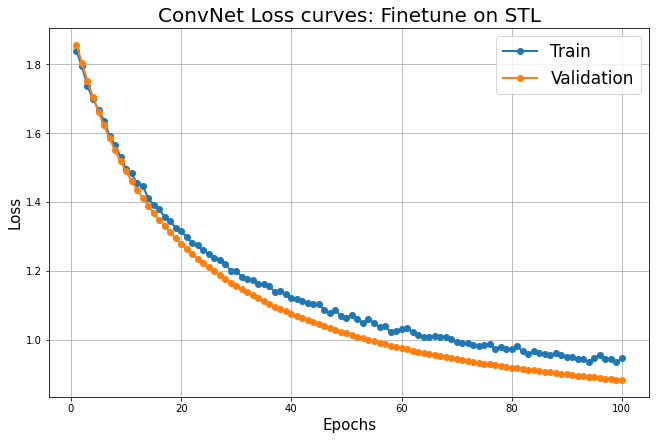

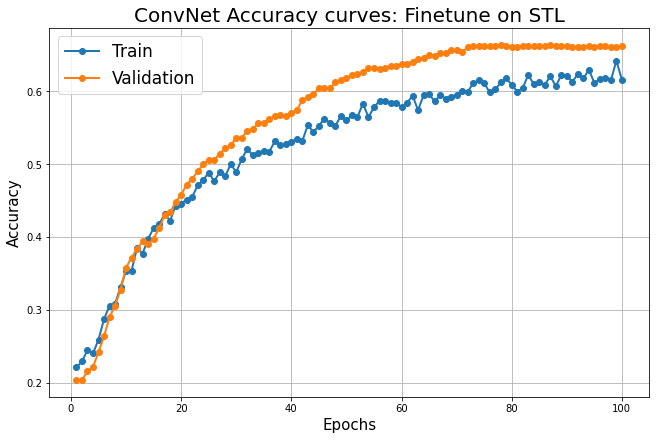

Evaluate: Epoch [1/1]: 100%|██████████████████████████████| 32/32 [00:00<00:00, 78.71it/s]                      

TEST 	: Summary: Loss: 0.8795 Accuracy: 0.6445


(0.8795049898326397, 0.6445)

In [86]:
fix_seed(0)

# define network
net = ConvNet(
    in_channels=3,
    num_classes=5,
    ckpt_path="../checkpoints/cnn_best_hparams.pt",
    return_features=False,
)

# freeze some layers
net.conv1.weight.requires_grad = False
net.conv1.bias.requires_grad = False

net.conv2.weight.requires_grad = False
net.conv2.bias.requires_grad = False

net.linear1.weight.requires_grad = False
net.linear1.bias.requires_grad = False

net.linear2.weight.requires_grad = False
net.linear2.bias.requires_grad = False

# define transforms
train_transforms = [
    {
        "name": "ToTensor",
        "args": {},
    },
    {
        "name": "Resize",
        "args": {"size": 32},
    },
    {
        "name": "Normalize",
        "args": {"mean": (0.5, 0.5, 0.5), "std": (0.5, 0.5, 0.5)},
    },
    {
        "name": "RandomAffine",
        "args": {"degrees": 10, "translate": (0.1, 0.1), "scale": (0.8, 1.2)},
    },
]
valid_transforms = [
    {
        "name": "ToTensor",
        "args": {},
    },
    {
        "name": "Resize",
        "args": {"size": 32},
    },
    {
        "name": "Normalize",
        "args": {"mean": (0.5, 0.5, 0.5), "std": (0.5, 0.5, 0.5)},
    },
]
test_transforms = [
    {
        "name": "ToTensor",
        "args": {},
    },
    {
        "name": "Resize",
        "args": {"size": 32},
    },
    {
        "name": "Normalize",
        "args": {"mean": (0.5, 0.5, 0.5), "std": (0.5, 0.5, 0.5)},
    },
]

num_epochs = 100
batch_size = 128

# define the datasets
valid_transform = InputTransform(valid_transforms)
valid_dataset = STL(root="../datasets/STL-10/", mode="valid", transform=valid_transform, encode_labels=True)
valid_loader = get_dataloader(valid_dataset, train=False, batch_size=batch_size, num_workers=0)

train_transform = InputTransform(train_transforms)
train_dataset = STL(root="../datasets/STL-10/", mode="train", transform=train_transform, encode_labels=True)
train_loader = get_dataloader(train_dataset, train=True, batch_size=batch_size, num_workers=0)

test_transform = InputTransform(test_transforms)
test_dataset = STL(root="../datasets/STL-10/", mode="test", transform=test_transform, encode_labels=True)
test_loader = get_dataloader(test_dataset, train=False, batch_size=batch_size, num_workers=0)

# define the optimizer and scheduler
opt_args = {"name": "Adam", "lr": 1e-4}

sch_args = None
# sch_args = {"name": "MultiStepLR", "milestones": [50], "gamma": 0.1}

opt = optimizer(model_params=net.parameters(), **opt_args)
sch = None
if sch_args is not None:
    sch = scheduler(opt=opt, **sch_args)
    
# define the loss function
loss_fn = nn.CrossEntropyLoss()

# train the model
epochs, train_losses, train_metrics, valid_losses, valid_metrics = train(
    net, loss_fn, train_loader, valid_loader, num_epochs=num_epochs, opt=opt, sch=sch,
)

arch = type(net).__name__

# plot training curves
plot_multiple_quantities_by_time(
    quantities=[train_losses["loss"], valid_losses["loss"]],
    time=epochs,
    labels=["Train", "Validation"],
    title=f"{arch} Loss curves: Finetune on STL",
    show=True,
    save=True,
    save_path="../results/cnn_finetuning_loss_plot_default.png",
    ylabel="Loss",
)
plot_multiple_quantities_by_time(
    quantities=[train_metrics["accuracy"], valid_metrics["accuracy"]],
    time=epochs,
    labels=["Train", "Validation"],
    title=f"{arch} Accuracy curves: Finetune on STL",
    show=True,
    save=True,
    save_path="../results/cnn_finetuning_accu_plot_default.png",
    ylabel="Accuracy",
)

N = net.eval()
evaluate(N, test_loader, nn.CrossEntropyLoss(), 1, 1, mode="test")

In [39]:
torch.save(net, "../checkpoints/cnn_finetuned_best_stl.pt")

### Evaluate on test set

In [40]:
net = ConvNet(
    in_channels=3,
    num_classes=5,
    ckpt_path="../checkpoints/cnn_finetuned_best_stl.pt",
    return_features=False,
    layer_to_ignore=None,
)
net = net.eval()

In [41]:
evaluate(net, test_loader, nn.CrossEntropyLoss(), 1, 1, mode="test")

Evaluate: Epoch [1/1]: 100%|██████████████████████████████| 32/32 [00:00<00:00, 78.33it/s]                      

TEST 	: Summary: Loss: 0.7493 Accuracy: 0.6990


(0.7493223370984197, 0.699)

### Visualize features after finetuning

In [13]:
# define the datasets
valid_transform = InputTransform(valid_transforms)
valid_dataset = STL(root="../datasets/STL-10/", mode="valid", transform=valid_transform, encode_labels=False)
valid_loader = get_dataloader(valid_dataset, train=False, batch_size=128, num_workers=0)

:::: Loaded dataset from ../datasets/STL-10/: X ((500, 96, 96, 3)) y (500)


In [14]:
net = ConvNet(
    in_channels=3,
    num_classes=5,
    ckpt_path="../checkpoints/cnn_finetuned_best_stl.pt",
    return_features=True,
    layer_to_ignore=None,
)
net = net.eval()

In [15]:
val_features = []
valid_labels = []

iterator = tqdm(valid_loader, f"Extracting features", bar_format='{l_bar}{bar:30}{r_bar}{bar:-10b}')
with torch.no_grad():
    for i, batch in enumerate(iterator):
        images, targets = batch
        output = net(images)
        val_features.append(output.numpy())
        valid_labels.append(targets.numpy())

Extracting features: 100%|██████████████████████████████| 4/4 [00:00<00:00, 64.72it/s]                          


In [16]:
valid_features = np.vstack(val_features)
valid_labels = np.concatenate(valid_labels)

In [17]:
valid_features.shape, valid_labels.shape

((500, 84), (500,))

In [18]:
X = valid_features
y = valid_labels

In [19]:
def visualize_features(
        X, y,
        title="Sample features",
        seed=0,
        save=False,
        save_path="../results/sample.png",
        show=True,
    ):
    np.random.seed(seed)

    tsne = TSNE(n_components=2, random_state=seed)
    Z = tsne.fit_transform(X)

    df = pd.DataFrame(None, columns=["Z1", "Z2", "label"])
    df["Z1"] = Z[:, 0]
    df["Z2"] = Z[:, 1]
    df["label"] = [LABEL_MAP[a].capitalize() for a in y]

    fig, ax = plt.subplots(1, 1, figsize=(11, 7))
    ax.grid()
    sns.scatterplot(
        data=df,
        x="Z1", y="Z2", hue="label", palette="Set2", legend=True, ax=ax, s=100,
    )
    ax.set_title(title, fontsize=17)
    
    plt.legend(fontsize=14)

    if save:
        plt.savefig(save_path, bbox_inches="tight")
    
    if save:
        plt.show()

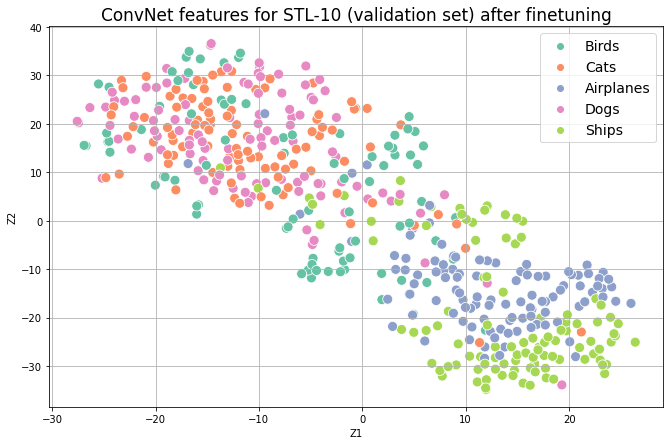

In [20]:
visualize_features(
    X, y,
    title="ConvNet features for STL-10 (validation set) after finetuning",
    save_path="../results/convnet_features_after_finetuning.png", save=True,
)

### Linear probing

:::: Loaded dataset from ../datasets/STL-10/: X ((500, 96, 96, 3)) y (500)
:::: Loaded dataset from ../datasets/STL-10/: X ((2000, 96, 96, 3)) y (2000)
:::: Loaded dataset from ../datasets/STL-10/: X ((4000, 96, 96, 3)) y (4000)


Extracting features: 100%|██████████████████████████████| 4/4 [00:00<00:00, 84.59it/s]                          


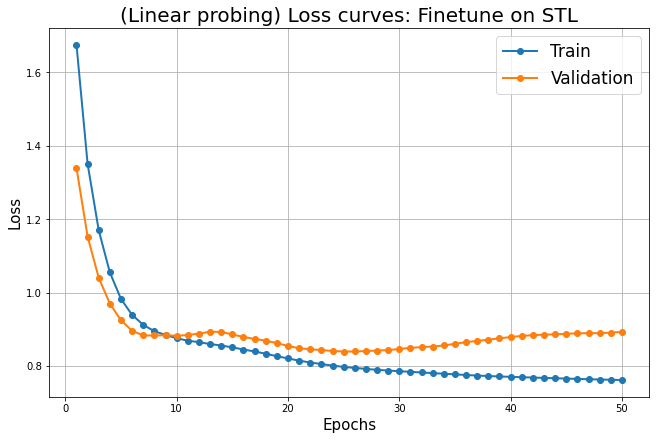

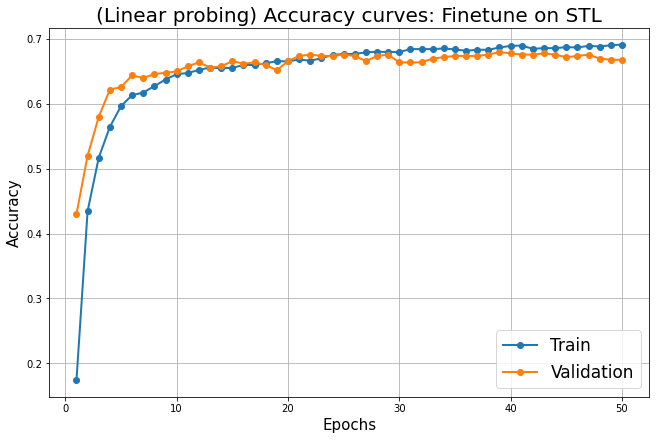

tensor(0.6680)


In [80]:
import torch
import torch.nn as nn
import torch.nn.functional as F

train_transforms = [
    {
        "name": "ToTensor",
        "args": {},
    },
    {
        "name": "Resize",
        "args": {"size": 32},
    },
    {
        "name": "Normalize",
        "args": {"mean": (0.5, 0.5, 0.5), "std": (0.5, 0.5, 0.5)},
    },
    {
        "name": "RandomAffine",
        "args": {"degrees": 10, "translate": (0.1, 0.1), "scale": (0.8, 1.2)},
    },
]
train_transform = InputTransform(train_transforms)


# define the datasets
valid_dataset = STL(root="../datasets/STL-10/", mode="valid", transform=valid_transform, encode_labels=True)
valid_loader = get_dataloader(valid_dataset, train=False, batch_size=batch_size, num_workers=0)

train_dataset = STL(root="../datasets/STL-10/", mode="train", transform=train_transform, encode_labels=True)
train_loader = get_dataloader(train_dataset, train=True, batch_size=batch_size, num_workers=0)

test_dataset = STL(root="../datasets/STL-10/", mode="test", transform=test_transform, encode_labels=True)
test_loader = get_dataloader(test_dataset, train=False, batch_size=batch_size, num_workers=0)

# test checkpoint loading
net = ConvNet(
    in_channels=3,
    num_classes=5,
    ckpt_path="../checkpoints/cnn_best_hparams.pt",
    return_features=True,
)
net = net.eval()

def get_features(net, data_loader):
    features = []
    labels = []

    iterator = tqdm(data_loader, f"Extracting features", bar_format='{l_bar}{bar:30}{r_bar}{bar:-10b}')
    with torch.no_grad():
        for i, batch in enumerate(iterator):
            images, targets = batch
            output = net(images)
            features.append(output)
            labels.append(targets)
    
    return torch.vstack(features), torch.cat(labels)

train_X, train_y = get_features(net, train_loader)
valid_X, valid_y = get_features(net, valid_loader)
test_X, test_y = get_features(net, valid_loader)

linnet = nn.Sequential(
    nn.Linear(84, 32),
    nn.Linear(32, 5)
)

opt = optimizer("Adam", linnet.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

train_losses = []
valid_losses = []
train_accura = []
valid_accura = []
epochs = []
num_epochs = 50

for i in range(1, num_epochs + 1):
    opt.zero_grad()

    y_pred = linnet(train_X)
    y_true = train_y
    loss = loss_fn(y_pred, y_true)
    y_pred = y_pred.argmax(1)
    train_accura.append((sum(y_true == y_pred) / len(y_true)))

    loss.backward()
    opt.step()

    train_losses.append(loss.item())
    
    with torch.no_grad():
        y_pred = linnet(valid_X)
        y_true = valid_y
        loss = loss_fn(y_pred, y_true)
        valid_losses.append(loss)
        y_pred = y_pred.argmax(1)
        valid_accura.append((sum(y_true == y_pred) / len(y_true)))
    
    epochs.append(i)

plot_multiple_quantities_by_time(
    quantities=[train_losses, valid_losses],
    time=epochs,
    labels=["Train", "Validation"],
    title=f"(Linear probing) Loss curves: Finetune on STL",
    show=True,
    ylabel="Loss",
)
plot_multiple_quantities_by_time(
    quantities=[train_accura, valid_accura],
    time=epochs,
    labels=["Train", "Validation"],
    title=f"(Linear probing) Accuracy curves: Finetune on STL",
    show=True,
    ylabel="Accuracy",
)

y_pred = linnet(test_X)
y_true = test_y
y_pred = y_pred.argmax(1)
print(sum(y_true == y_pred) / len(y_true))

In [ ]:
torch.save(linnet, "../checkpoints/linear_probing_on_stl.pt")